In [41]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest
from sklearn.linear_model import LogisticRegression



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.952734,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.279403,1
1,-0.951963,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.707324,1
2,-0.905356,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,2.889454,1
3,-0.875874,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.499835,1
4,-0.869648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.266196,1


In [35]:
data = pd.read_csv(r'./data versions/data_over.csv')
# rs_time = RobustScaler()
# rs_amount = RobustScaler()
# data['Amount'] = rs_amount.fit_transform(data['Amount'].values.reshape(-1, 1))
# data['Time'] = rs_time.fit_transform(data['Time'].values.reshape(-1,1))
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.952734,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.279403,1
1,-0.951963,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,6.707324,1
2,-0.905356,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,2.889454,1
3,-0.875874,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.499835,1
4,-0.869648,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.266196,1


<AxesSubplot:>

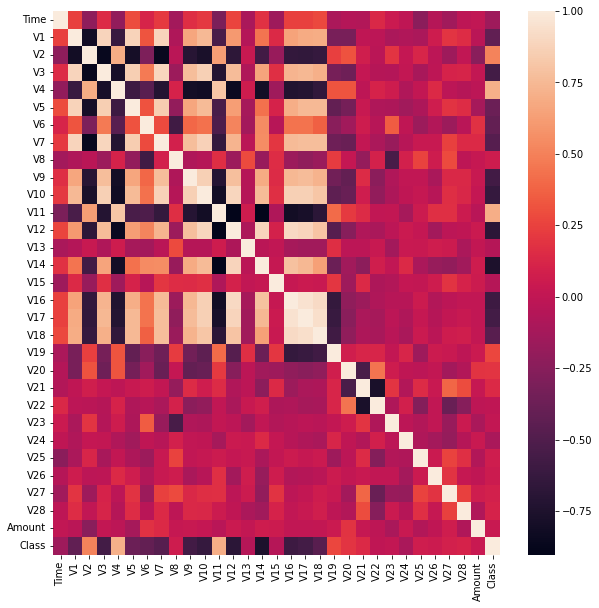

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr())

In [33]:
corr = data.corr()
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data.columns[columns]
print(selected_columns)
data = data[selected_columns]

True
True
True
True
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V19', 'V20', 'V21', 'V22', 'V23',
       'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [37]:
def removeCorr(data):
    corr = data.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= 0.9:
                print(True)
                if columns[j]:
                    columns[j] = False
    selected_columns = data.columns[columns]
    data = data[selected_columns]
    return data
data = removeCorr(data)

True
True
True
True


In [38]:
data.to_csv('./data versions/corr_feat_data.csv')

# Anova

In [46]:
data = pd.read_csv(r'./data versions/data_over.csv')
X, y = data.iloc[:,:-1], data.iloc[:, -1]
fs = SelectKBest(score_func = f_classif, k=15)
fs.fit(X,y)


SelectKBest(k=15)

In [1]:
x = fs.transform(X)

NameError: name 'fs' is not defined

In [52]:
x.shape[1]

15

In [53]:
datax = pd.DataFrame(x)
datax.columns = ['V_' + str(i+1) for i in range(x.shape[1])]
datax.head()

,V_1,V_2,V_3,V_4,V_5,V_6,V_7,V_8,V_9,V_10,V_11,V_12,V_13,V_14,V_15
0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,-2.770089,-2.772272,3.202033,-2.899907,-4.289254,-1.140747,-2.830056,-0.016822
1,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.270953,-0.838587,-0.414575,-0.503141,-1.692029,0.666780,0.599717,1.725321
2,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.238253,-1.525412,2.032912,-6.560124,-1.470102,-2.282194,-4.781831,-2.615665
3,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.247768,-4.801637,4.895844,-10.912819,-6.771097,-7.358083,-12.598419,-5.131549
4,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-1.282858,-2.447469,2.101344,-4.609628,-6.079337,2.581851,6.739384,3.042493


In [58]:
datay = pd.DataFrame(y)
data = pd.concat([datax, datay], axis=1)

In [61]:
data.to_csv('./data versions/anova_data.csv')

# Selecting columns based on p-

__What is p-value?__

P-value or probability value or asymptotic significance is a probability value for a given statistical model that, if the null hyothesis is true, a set of statistical observations more commonly known as the statistical summary is greater than or equal in magnitude to the observed results.

__How does p-value help in feature selection?__

Removal of different features from the dataset will have different effects on the p-value for the dataset. We can remove different features and measure the p-value in each case. These measured p-values can be used to decide whether to keep a feature or not.

In [65]:
import statsmodels.regression.linear_model as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns



In [73]:
SL = 0.05
data = pd.read_csv(r'./data versions/data_over.csv')
selected_columns = data.columns[:-1].values
data_modeled, selected_columns = backwardElimination(data.iloc[:,:-1].values, data.iloc[:,-1].values, SL, selected_columns)

In [74]:
data = pd.DataFrame(data_modeled, columns=selected_columns)

In [75]:
data.shape

(10000, 26)

In [77]:
data.to_csv('./data versions/pvalue.csv')